In [85]:
# Read the dataset
cars_data = read.csv('Toyota_SimpleReg.csv')

In [86]:
# Display the column names
colnames(cars_data)

[1] "Id"        "Model"     "Price"     "Age_06_15"

In [87]:
colnames(cars_data)[4] = 'Age'

In [88]:
# Structure of the dataset
str(cars_data)

'data.frame':	1436 obs. of  4 variables:
 $ Id   : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Model: Factor w/ 372 levels " TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors",..: 332 332 67 332 331 331 64 326 62 59 ...
 $ Price: int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age  : int  57 57 58 60 64 66 61 64 61 57 ...


In [89]:
# number of rows
nrow(cars_data)

[1] 1436

In [90]:
# number of columns
ncol(cars_data)

[1] 4

In [91]:
# Summary of the data
summary(cars_data)

       Id                                                         Model     
 Min.   :   1.0   TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-Doors: 107  
 1st Qu.: 361.8   TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-Doors:  83  
 Median : 721.5   TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors  :  79  
 Mean   : 721.6   TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-Doors :  70  
 3rd Qu.:1081.2   TOYOTA Corolla 1.6 16V SEDAN LINEA TERRA 4/5-Doors :  43  
 Max.   :1442.0   TOYOTA Corolla 1.4 16V VVT I HATCHB TERRA 2/3-Doors:  42  
                  (Other)                                            :1012  
     Price            Age        
 Min.   : 4350   Min.   : 35.00  
 1st Qu.: 8450   1st Qu.: 78.00  
 Median : 9900   Median : 95.00  
 Mean   :10731   Mean   : 89.95  
 3rd Qu.:11950   3rd Qu.:104.00  
 Max.   :32500   Max.   :114.00  
                                 

In [92]:
#get the number of missing values
sum(is.na(cars_data))

[1] 0

In [93]:
# Column-wise missing values

colSums(is.na(cars_data))

Id Model Price   Age 
    0     0     0     0

In [94]:
# drop the model and ID attributes

drop_cols = c("Model","Id")
cars_data[drop_cols] = NULL
str(cars_data)

'data.frame':	1436 obs. of  2 variables:
 $ Price: int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age  : int  57 57 58 60 64 66 61 64 61 57 ...


In [95]:
colnames(cars_data)

[1] "Price" "Age"

In [96]:
str(cars_data)

'data.frame':	1436 obs. of  2 variables:
 $ Price: int  13500 13750 13950 14950 13750 12950 16900 18600 21500 12950 ...
 $ Age  : int  57 57 58 60 64 66 61 64 61 57 ...


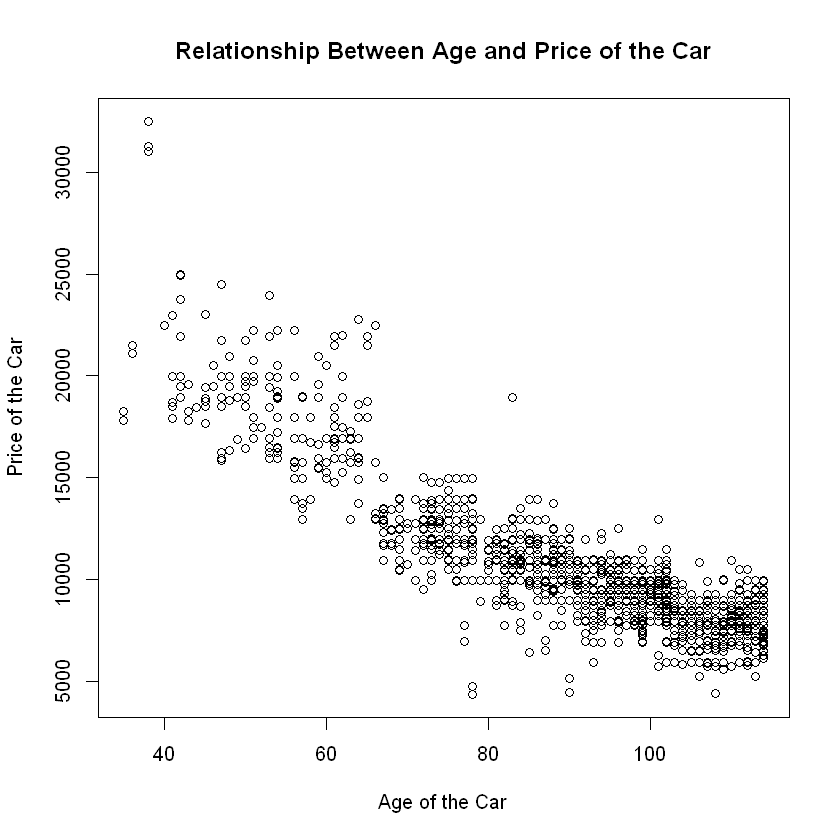

In [97]:
plot(cars_data$Age, cars_data$Price, xlab = "Age of the Car", ylab = "Price of the Car", main = "Relationship Between Age and Price of the Car")

In [98]:
# Covariance of the data
cov(cars_data)

,Price,Age
Price,13154872.10,-59136.1089
Age,-59136.11,345.9596


In [99]:
# Correlation
cor_data = cor(cars_data)
cor_data

,Price,Age
Price,1.0000000,-0.8765905
Age,-0.8765905,1.0000000


In [100]:
#install.packages("corrplot")

Installing package into 'C:/Users/Syed Shariff/Documents/R/win-library/3.6'
(as 'lib' is unspecified)
Warning message:
"package 'corrplot' is in use and will not be installed"

In [101]:
library(corrplot)

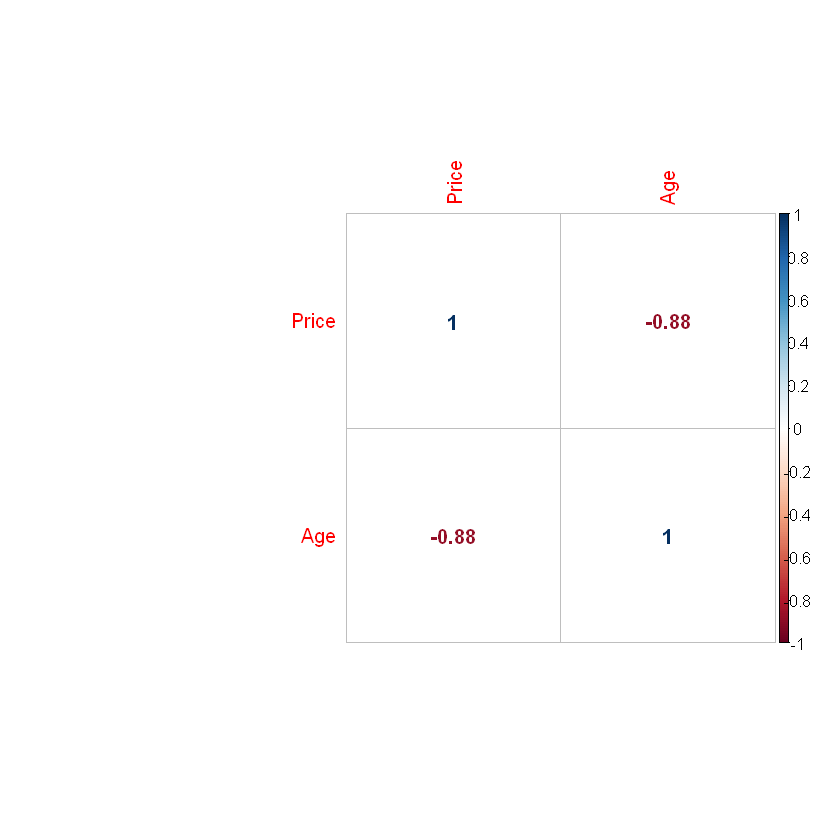

In [102]:
#correlation plot
corrplot(cor_data,method="number")

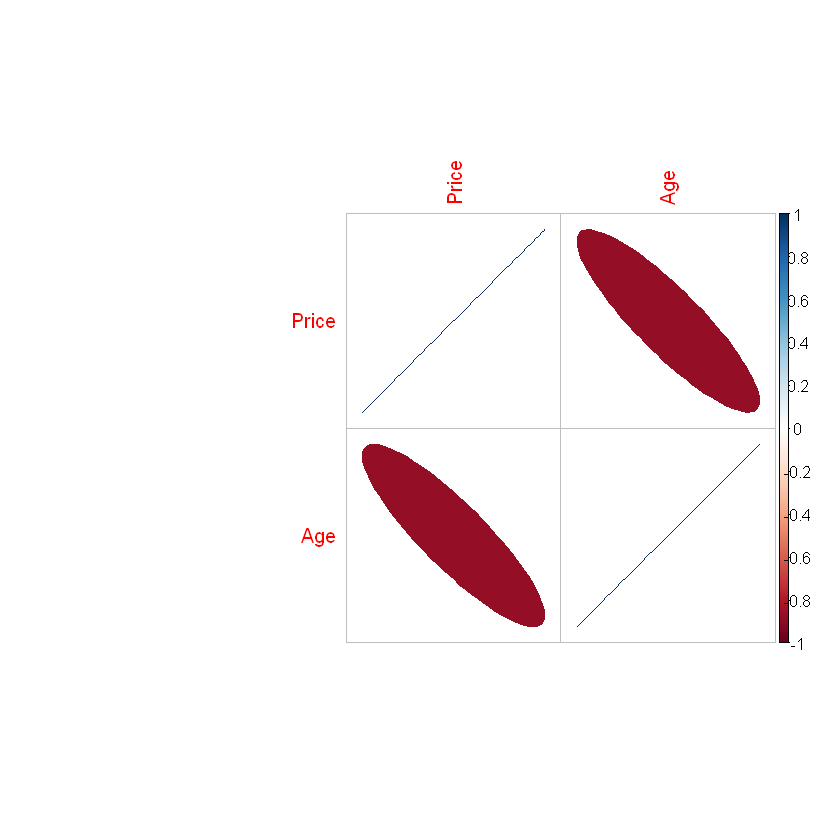

In [103]:
#correlation plot
corrplot(cor_data,method="ellipse")

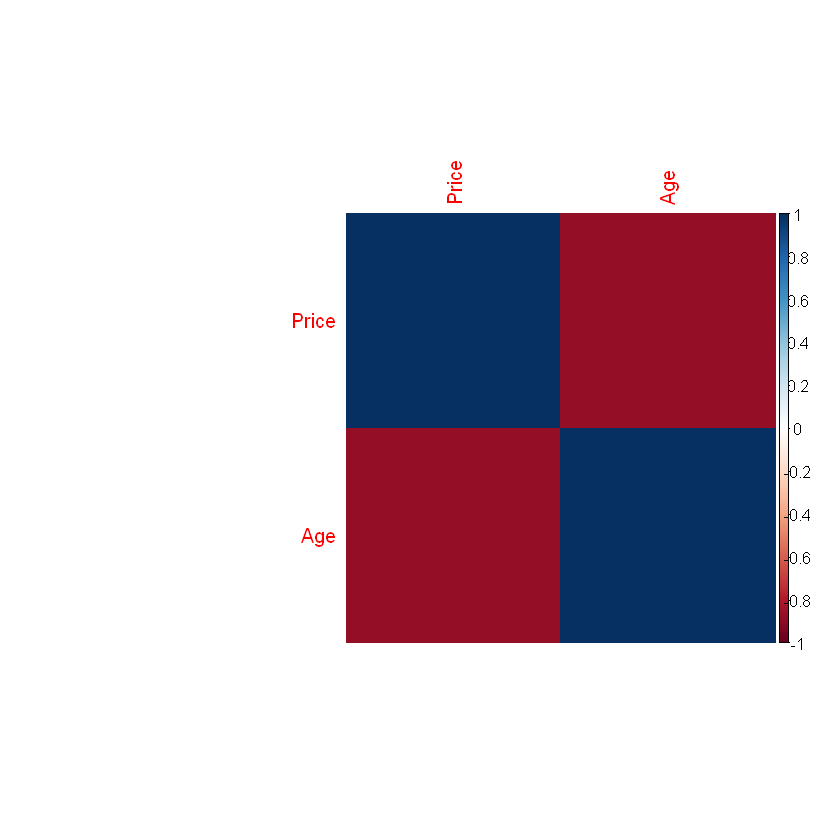

In [104]:
#correlation plot
corrplot(cor_data,method="color")

In [105]:
help(corrplot)

In [106]:
set.seed(123)

In [107]:
# Use this to create partition
library(caret)

In [108]:
# Consider the data and build partition
trainIndex = createDataPartition(cars_data$Price, p = 0.7, list = FALSE)

In [109]:
# Split train and test data
cars_train = cars_data[trainIndexc,]
cars_test = cars_data[-trainIndex,]

In [110]:
# Build the model
LinReg = lm(Price ~ Age, data = cars_train)

In [114]:
coefficients(LinReg)

(Intercept)         Age 
 26206.1016   -171.9603

In [119]:
#summarise the Linear Regression

summary(LinReg)


Call:
lm(formula = Price ~ Age, data = cars_train)

Residuals:
    Min      1Q  Median      3Q     Max 
-8043.2  -996.1   -56.3   821.7 12828.4 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 26206.102    268.584   97.57   <2e-16 ***
Age          -171.960      2.932  -58.66   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1754 on 1005 degrees of freedom
Multiple R-squared:  0.7739,	Adjusted R-squared:  0.7737 
F-statistic:  3441 on 1 and 1005 DF,  p-value: < 2.2e-16


## Residual Analysis

In [120]:
# To extract the residual
head(LinReg$residuals)

2          3          4          5          6          8 
-2654.3641 -2282.4038  -938.4832 -1450.6420 -1906.7214  3399.3580

In [122]:
# To fitted Predictions
head(LinReg$fitted.values)

2        3        4        5        6        8 
16404.36 16232.40 15888.48 15200.64 14856.72 15200.64

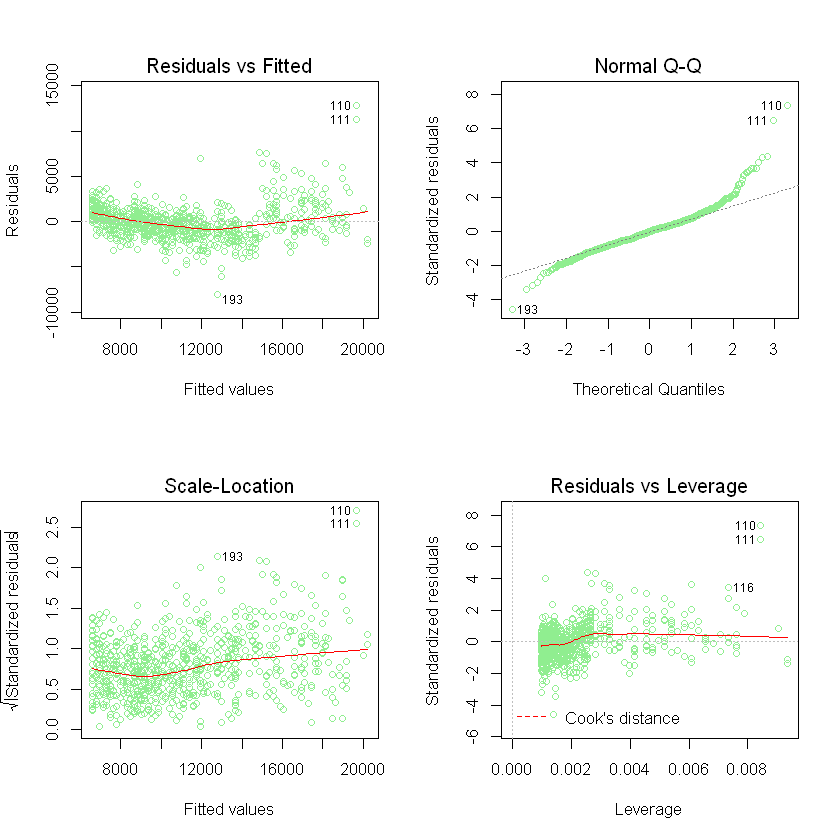

In [126]:
# helps set the graphic parameters
par(mfrow = c(2,2))
# Check for validity of linear regression assumptions
plot(LinReg, col = 'light green') 

In [ ]:
#Linearity #Normality # Homoscadscity # Independents/Outliers/Influential Points
# Parallel and pass thru 0 # Diagonal means normal # Parallel # 

## Predict the test data

In [127]:
test_prediction = predict(object = LinReg,newdata = cars_test)

In [128]:
test_prediction

1         7        18        20        22        31        38        41 
16404.364 15716.523 16232.404 15200.642 15372.602 15372.602 16404.364 16576.324 
       49        50        53        58        59        61        64        66 
16576.324 15028.682 15888.483 15888.483 16404.364 16576.324 15200.642 15888.483 
       70        73        74        84        85        88        90        98 
16060.444 15544.563 16404.364 15028.682 16060.444 16920.245 17092.205 17092.205 
      102       105       106       107       112       113       117       121 
17092.205 18467.888 17092.205 17952.007 19671.610 18983.769 18983.769 18123.967 
      122       128       131       132       134       139       140       142 
17092.205 16920.245 16920.245 16920.245 18123.967 18467.888 16920.245 17092.205 
      171       175       176       179       183       188       189       192 
18811.808 18983.769 18983.769 18983.769 20015.531 13824.960 13481.039 12793.198 
      194       198       199       200       205       206       209       213 
13481.039 13652.999 13137.118 13652.999 12965.158 12793.198 13309.079 14512.801 
      215       219       225       232       234       235       240       243 
14684.761 12793.198 14340.840 14684.761 13309.079 13309.079 13481.039 12965.158 
      252       253       256       259       260       263       266       269 
12965.158 12965.158 13137.118 12793.198 14684.761 13309.079 13824.960 13481.039 
      274       276       280       282       284       286       290       293 
14512.801 13309.079 13824.960 13481.039 13481.039 13652.999 12965.158 14340.840 
      295       297       298       300       301       305       308       312 
13137.118 12793.198 13481.039 13652.999 13996.920 12793.198 13137.118 12793.198 
      313       315       316       317       318       320       321       323 
13137.118 12965.158 13309.079 12793.198 13824.960 12793.198 13481.039 13996.920 
      328       329       330       332       336       339       340       352 
14684.761 14340.840 12965.158 14340.840 14340.840 12965.158 13137.118 13137.118 
      353       360       365       366       368       370       372       380 
13824.960 13309.079 13824.960 13309.079 13309.079 12793.198 14340.840 11589.476 
      382       383       384       385       394       396       398       407 
11073.595 12621.237 10901.634 11073.595 10729.674 12105.356 12277.317 11589.476 
      409       415       416       418       420       422       429       430 
11761.436 11933.396 10901.634 11073.595 10901.634 11245.555 11761.436 11761.436 
      431       435       438       441       442       453       460       461 
11761.436 11933.396 12105.356 11073.595 11761.436 11933.396 11245.555 10901.634 
      462       469       473       474       481       483       484       486 
11933.396 11417.515 11417.515 10729.674 12105.356 11073.595 10729.674 11761.436 
      489       490       496       502       504       507       510       513 
10729.674 11245.555 11417.515 12277.317 10901.634 11245.555 12449.277 11589.476 
      519       521       523       527       528       533       537       541 
12105.356 11073.595 11245.555 12105.356 11073.595 11073.595 10729.674 12277.317 
      545       547       551       556       557       561       564       567 
11761.436 10729.674 11933.396 11761.436 12277.317 11073.595 11589.476 10901.634 
      569       572       575       577       578       584       588       590 
11417.515 11417.515 11933.396 12449.277 10729.674 12449.277 11417.515 10901.634 
      593       598       602       605       606       607       609       616 
12277.317 11589.476 11761.436  8666.150  8666.150 10213.793  9182.031  8838.111 
      620       621       624       635       638       641       642       653 
 9182.031  8666.150  9869.872  9697.912 10213.793  8666.150  8666.150  9525.952 
      656       657       663       666       670       675       678       679 
10213.793  8838.111  9869.872  9525.952

In [139]:
cars_test$Price_Hat = test_prediction

## Performance Metrics

### Mean Absolute Error 

$$MAE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|y_{i} - \hat{y_{i}}|$$

In [ ]:
mae = function(x,xhat){
    mean(abs(x-xhat))
    
}

In [147]:
mae(cars_test$Price,cars_test$Price_hat)

[1] 1234.124

### Mean Squared Error

$$MSE = \dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2$$

In [148]:
mse = function(x,xhat){
    mean((x-xhat)^2)
    
}

In [149]:
mse(cars_test$Price,cars_test$Price_hat)

[1] 2985311

### Root Mean Squared Error

$$RMSE = \sqrt{\dfrac{1}{n}\times\sum_{i = 1}^{n}(y_{i} - \hat{y_{i}})^2}$$

In [150]:
rmse = function(x,xhat){
    sqrt(mean((x-xhat)^2))
    
}

In [151]:
rmse(cars_test$Price,cars_test$Price_hat)

[1] 1727.805

### Mean Absolute Percentage Error

$$MAPE = \dfrac{1}{n}\times\sum_{i = 1}^{n}|\dfrac{y_{i} - \hat{y_{i}}}{y_i}|$$

In [152]:
mape = function(x,xhat){
    mean(abs((x-xhat)/x))
    
}

In [153]:
mape(cars_test$Price,cars_test$Price_hat)

[1] 0.1233866

In [158]:
#install.packages('DMwR')

In [159]:
library(DMwR)

Warning message:
"package 'DMwR' was built under R version 3.6.2"Loading required package: grid
Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 


In [160]:
# 
regr.eval(cars_train$Price,LinReg$fitted.values)

mae          mse         rmse         mape 
1.256821e+03 3.070188e+06 1.752195e+03 1.208212e-01

In [161]:
regr.eval(cars_test$Price,cars_test$Price_hat)

mae          mse         rmse         mape 
1.234124e+03 2.985311e+06 1.727805e+03 1.233866e-01